# 너비우선 탐색(BFS)
----
* Breadth-First Search
* 깊이 탐색하기 전에 넓게 탐색하는 방법.(너비우선 탐색)  
    * 최대한 넓게 이동한 다음, 더이상 갈 수 없을 때 아래로 이동    
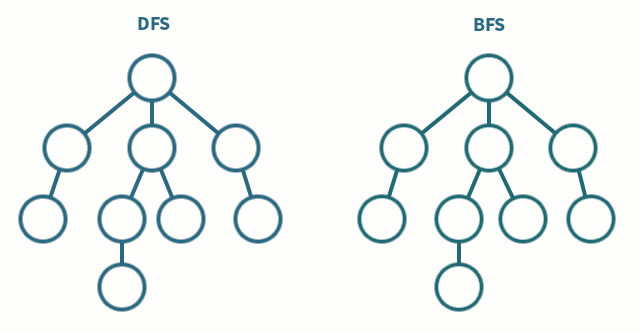  
    출처 나무 위키. 

<br/>

* 탐색 방법.  
    1. 루트에서 시작  
    2. 자식 노드를 [1]에 저장  
    3. [1]에 저장된 노드들을 차례로 방문 및 각각의 자식을 [2]에 저장.  
    4. 3번을 반복.    
    5. 모든 노드를 방문하면 탐색 종료.  

<br/>  

* 주로 사용   
    * 두 노드 간의 최단 경로 탐색.   
        * 모든 사람을 각 노드로 하여, 알고 있다고 하면, 그중 나와 특정한 사람을 찾을때(촌)
    * 임의의 경로를 탐색.

<br/>

* 구현  
    * Queue(큐) 사용.  
        * 선입선출(FIFO)
        * 큐를 이용한 반복적 형태로 구현이 가장 간단.
    * 직관적이지 않음.
        * DFS보다 구현 난이도가 있음.
    * 어떤 노드에 방문했었는지 여부를 반드시 검사.
        * 무한 루프의 위험성이 있음.

<br/>

* 시간 복잡도  
    * 모든 노드를 검색.  
    * 다음 노드가 방문했는지 확인하는 시간 + 각 노드를 방문하는 시간   
    * 노드가 N, E가 간선(노드를 잇는 선)일 때 
        * 인접 리스트 일때 $O(N+E)$
        * 인접 행렬일때 $O(N^2)$

In [ ]:
# 구현(출처. 나무위키)
def bfs(graph:Dict, start:int): # Dict 자료형 형태로 준다. key는 노드, value는 인접노드를 가리킨다.
    visited = {i:False for i in graph.keys()} # 방문 배열. visited[node] = True이면 node는 방문이 끝난 상태이다.
    queue = [start]
    visited[start] = True
    while len(queue) > 0: # 큐가 빌 때까지 반복
        current = queue.pop(0) #queue에서 노드를 하나 빼 온다. 이 노드를 current라고 하자.
        for nxt in graph[current]: # current의 인접 노드들을 확인한다. 이 각각의 노드를 nxt라고 하자.
            if not visited[nxt]: # 만일 nxt에 방문하지 않았다면
                #nxt 방문
                queue.append(nxt)
                visited[nxt] = True

# 깊이 우선 탐색(DFS)
----
* Depth-Fist Search
* 임의의 노드에서 시작해서 다운 분기로 넘어가기 전에 해당 분기를 완벽하게 탐색하는 방법.
* 넓게 탐색하기 전에 깊게 탐색하는 방법.(깊이 우선 탐색.)  
    * 최대한 깊게 내려간 다음, 더이상 내려갈 수 없을 때 옆으로 이동.
    * 정답이 깊은 노드에 있다면 빠르게 도출 가능.
    * 현재 경로상의 노드들만 기억하면 되므로 저장 공간 수요가 적음.
    * **얻어진 해가 최단 경로가 된다는 보장이 없음**
    
<br/>

* 탐색 방법.  
    1. 현재 노드를 방문한것으로 표시
    2. 방문 표시가 되어 있지않는 각각의 인접한 노드 탐색 
    3. 더 이상 방문하지 않는 노드가 없다면 이전 노드로 역추적한다.    
    5. 모든 노드를 방문하면 탐색 종료. 

<br/>  

* 주로 사용   
    * 자동 미로 생성.
        * 방향을 무작위로 계속 생성 후 막히면 진행이 가능한 곳으로 돌아가 다시 진행.
        * [링크](https://www.youtube.com/watch?v=0kaHIfrB3T4&feature=youtu.be)
        * 백트래킹.
            * 모든 경우의 수를 전부 고려하는 알고리즘.

<br/>

* 구현  
    * 재귀호출(Recursive Function) 및 스택(stack) 구현.  
        * 선입후출(FILO) - 스택
            * 방문한 노드들을 스택에 저장 후 다시 꺼내어 작업.
        * 자기 자신을 다시 호출하는 함수. 
            * 무한 루프의 위험성이 있음.
    * 어떤 노드에 방문했었는지 여부를 반드시 검사.
        * 무한 루프의 위험성이 있음.

<br/>

* 시간 복잡도  
    * BFS와 동일.
    * 모든 노드를 검색.  
    * 다음 노드가 방문했는지 확인하는 시간 + 각 노드를 방문하는 시간   
    * 노드가 N, E가 간선(노드를 잇는 선)일 때 
        * 인접 리스트 일때 $O(N+E)$
        * 인접 행렬일때 $O(N^2)$

In [ ]:
# DFS 구현(출처. 나무위키)
def dfs(graph:Dict, start:int): # Dict 자료형 형태로 준다. key는 노드, value는 인접노드를 가리킨다.
    visited = {i:False for i in graph.keys()} # 방문 배열. visited[node] = True이면 node는 방문이 끝난 상태이다.
    def search(current:int): # 재귀함수 정의
        visited[current] = True # current 방문
        for nxt in graph[current]: # current의 인접 노드를 확인한다. 이 노드를 nxt라고 하자.
            if not visited[nxt]: # 만일 nxt에 방문하지 않았다면
                search(nxt) #nxt 방문
    search(start)


# BFS/DFS

|BFS|DFS|
|:------:|:---:|
|너비우선탐색|깊이우선 탐색|
|검색속도 비교적 빠름|검색속도 비교적 느림|
|구현난이도 비교적 어려움|구현난이도 비교적 쉬움|